# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the datetime and timezone modules from the datetime library.
from datetime import datetime, timezone

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [65]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=metric" + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.fromtimestamp(city_weather["dt"], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | arizona city
Processing Record 3 of Set 1 | naldurg
Processing Record 4 of Set 1 | ijuw
City not found. Skipping...
Processing Record 5 of Set 1 | aweil
Processing Record 6 of Set 1 | galliano
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | mejit
Processing Record 10 of Set 1 | san jose de jachal
Processing Record 11 of Set 1 | yazd
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | labytnangi
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | nyurba
Processing Record 17 of Set 1 | saint-francois
Processing Record 18 of Set 1 | rio grande
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | adamstown
Processing Record 22 

In [66]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [67]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,0.85,74,75,5.66,CA,2024-06-10 02:46:59
1,arizona city,32.7559,-111.6710,35.12,11,67,0.89,US,2024-06-10 02:46:59
2,naldurg,17.8167,76.3000,27.28,64,34,6.76,IN,2024-06-10 02:47:00
3,aweil,8.7682,27.4002,23.20,85,100,1.44,SS,2024-06-10 02:47:00
4,galliano,29.4422,-90.2992,27.78,77,2,2.91,US,2024-06-10 02:47:00


In [68]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,74,75,5.66,CA,2024-06-10 02:46:59
1,arizona city,32.7559,-111.6710,35.12,11,67,0.89,US,2024-06-10 02:46:59
2,naldurg,17.8167,76.3000,27.28,64,34,6.76,IN,2024-06-10 02:47:00
3,aweil,8.7682,27.4002,23.20,85,100,1.44,SS,2024-06-10 02:47:00
4,galliano,29.4422,-90.2992,27.78,77,2,2.91,US,2024-06-10 02:47:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

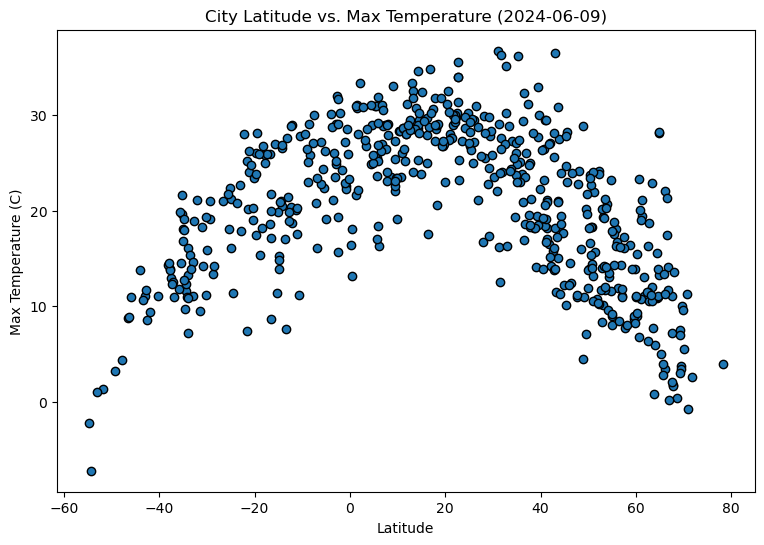

In [70]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.Timestamp.now().date()) + ')')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

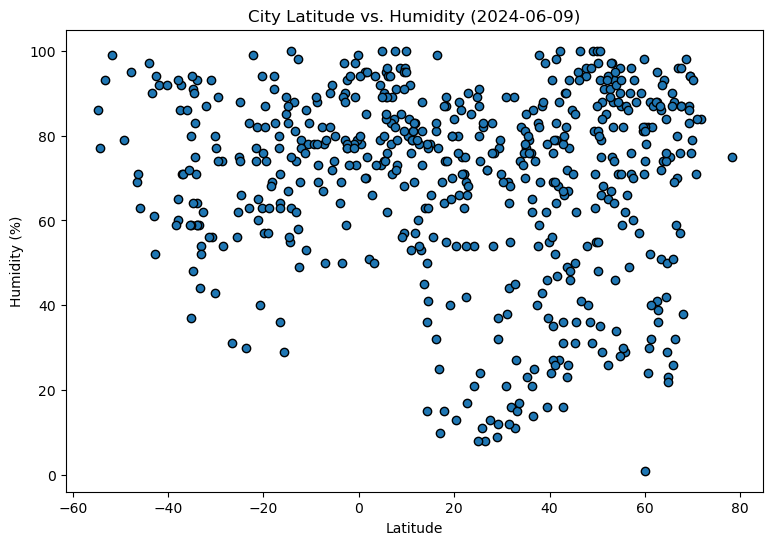

In [71]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.Timestamp.now().date()) + ')')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

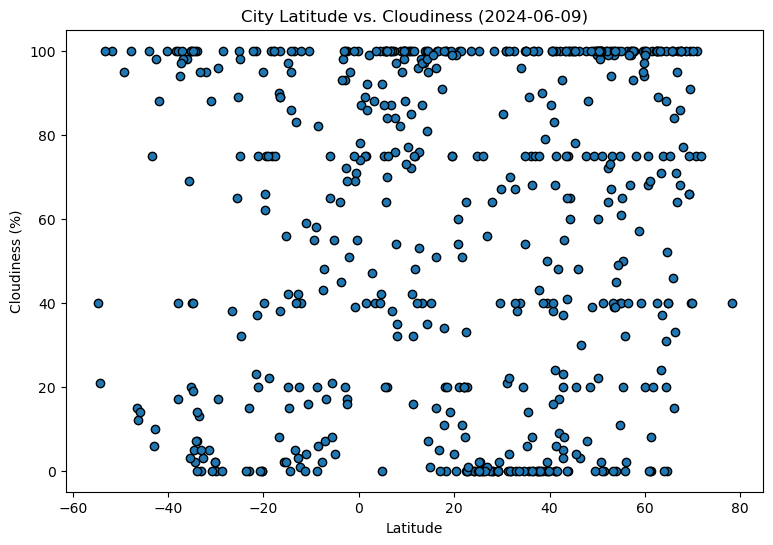

In [72]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.Timestamp.now().date()) + ')')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

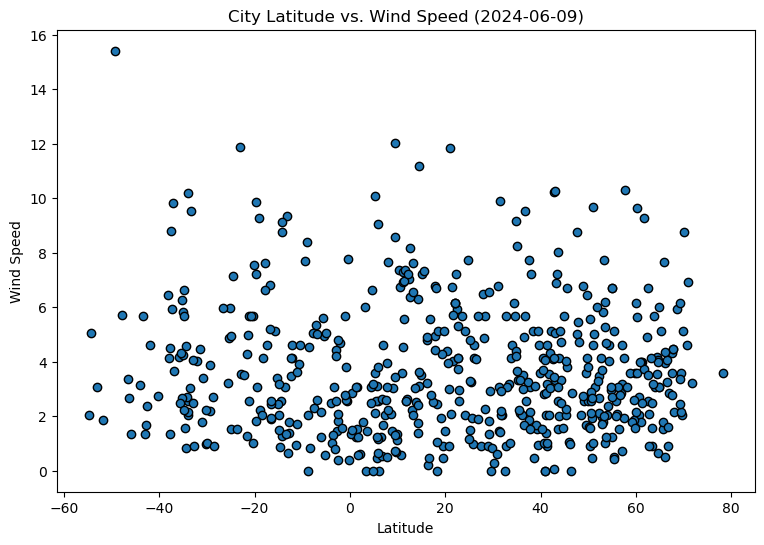

In [73]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.Timestamp.now().date()) + ')')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [101]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, title):
    x = np.array(x)
    y = np.array(y)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept

    # Create line equation string:
    line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # Create the scatter plot
    plt.scatter(x, y, marker='o', edgecolors='black')
    plt.plot(x, regression_line, color='red', label=f'Linear regression\ny = {slope:.2f}x + {intercept:.2f}\nr_value = {r_value:.2f}')

    # Add plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    print(f"The r_value is: {r_value}")
    plt.show()

In [95]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,74,75,5.66,CA,2024-06-10 02:46:59
1,arizona city,32.7559,-111.6710,35.12,11,67,0.89,US,2024-06-10 02:46:59
2,naldurg,17.8167,76.3000,27.28,64,34,6.76,IN,2024-06-10 02:47:00
3,aweil,8.7682,27.4002,23.20,85,100,1.44,SS,2024-06-10 02:47:00
4,galliano,29.4422,-90.2992,27.78,77,2,2.91,US,2024-06-10 02:47:00


In [96]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,san jose de jachal,-30.2406,-68.7469,11.18,43,2,0.98,AR,2024-06-10 02:47:01
10,hithadhoo,-0.6000,73.0833,28.52,73,71,2.54,MV,2024-06-10 02:47:02
12,hermanus,-34.4187,19.2345,11.56,75,2,4.56,ZA,2024-06-10 02:47:02
16,rio grande,-32.0350,-52.0986,21.06,87,95,4.01,BR,2024-06-10 02:47:03
19,adamstown,-25.0660,-130.1015,22.35,75,100,5.98,PN,2024-06-10 02:47:03


###  Temperature vs. Latitude Linear Regression Plot

The r_value is: -0.7347659311826868


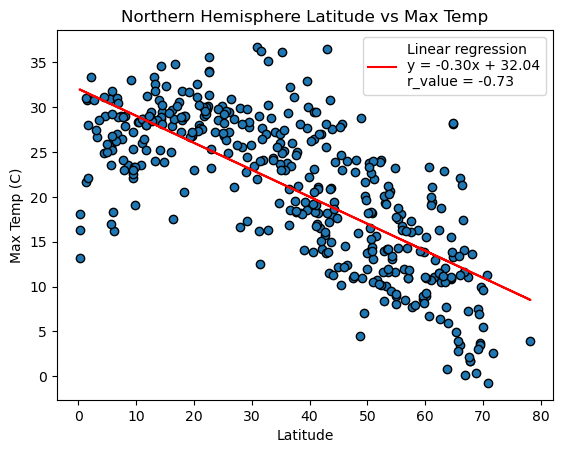

In [104]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Max Temp'], 
                       x_label='Latitude', 
                       y_label='Max Temp (C)', 
                       title ='Northern Hemisphere Latitude vs Max Temp')


The r_value is: 0.758414893250666


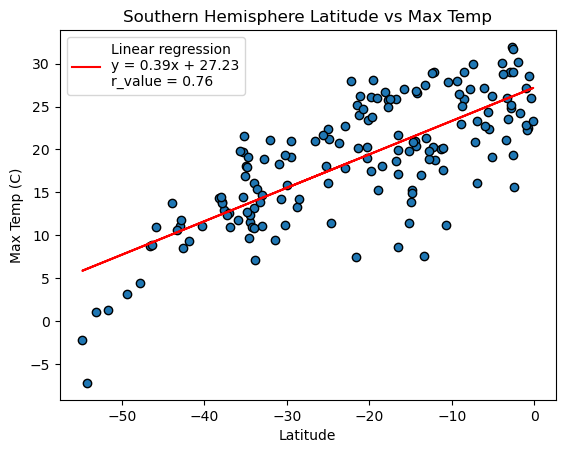

In [107]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Max Temp'], 
                       x_label='Latitude', 
                       y_label='Max Temp (C)', 
                       title ='Southern Hemisphere Latitude vs Max Temp')

**Discussion about the linear relationship:**
In the Northern Hemisphere, we see a strong negative correlation between latitude and max temperature.  Maximum temperatures are higher the closer a city is to the equator, or 0 degrees latitude.  Maximum temperatures decrease as latitude coordinates increase, i.e. get closer to the North Pole.

Conversely, there is a positive correlation between latitude and max temperature in the Southern Hemisphere.  Here we see that max temperatures increase as latitudes increase, i.e. get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r_value is: -0.03182874998368654


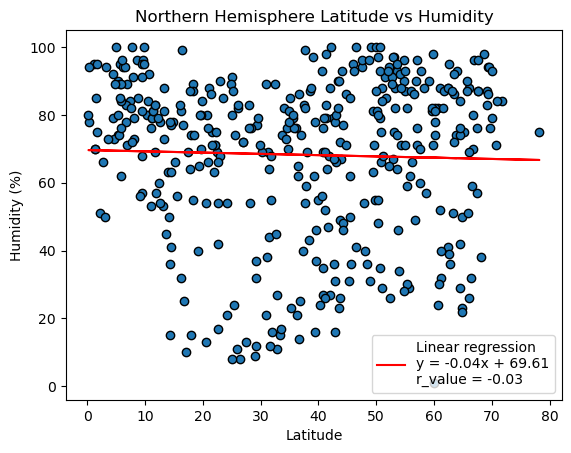

In [108]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Humidity'], 
                       x_label='Latitude', 
                       y_label='Humidity (%)', 
                       title ='Northern Hemisphere Latitude vs Humidity')

The r_value is: 0.06970613109123028


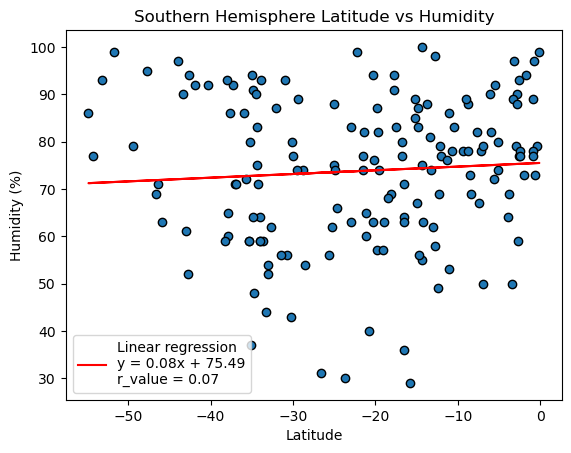

In [109]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Humidity'], 
                       x_label='Latitude', 
                       y_label='Humidity (%)', 
                       title ='Southern Hemisphere Latitude vs Humidity')

**Discussion about the linear relationship:**
There is almost no discenerable correlation between latitude and humidity in either the Northern or Southern hemispheres.  There is a very slight positive correlation in the Southern Hemisphere and also a very slight negative correlation in the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r_value is: 0.019306575616142935


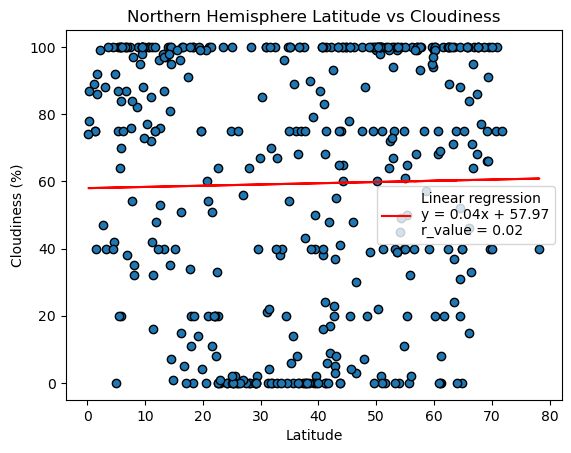

In [110]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Cloudiness'], 
                       x_label='Latitude', 
                       y_label='Cloudiness (%)', 
                       title ='Northern Hemisphere Latitude vs Cloudiness')

The r_value is: -0.0068857578812296935


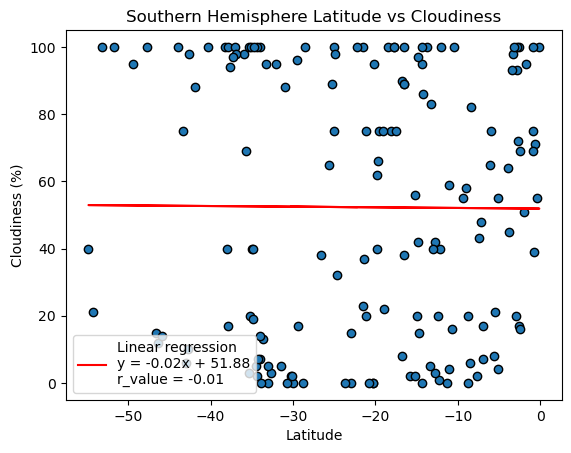

In [111]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Cloudiness'], 
                       x_label='Latitude', 
                       y_label='Cloudiness (%)', 
                       title ='Southern Hemisphere Latitude vs Cloudiness')

**Discussion about the linear relationship:**
Almost no correlation is observed between latitude and cloudiness in either Northern or Southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r_value is: 0.011224692241102837


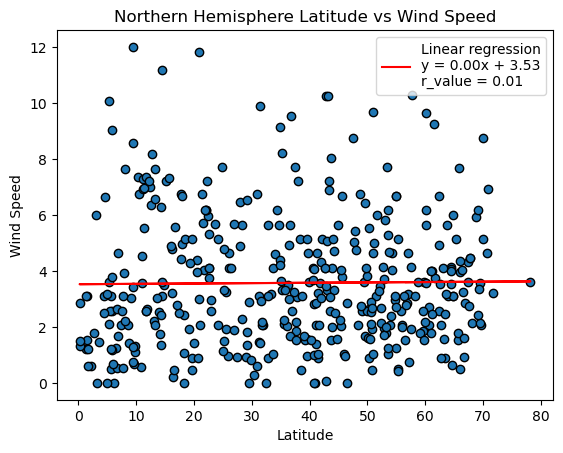

In [112]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], 
                       northern_hemi_df['Wind Speed'], 
                       x_label='Latitude', 
                       y_label='Wind Speed', 
                       title ='Northern Hemisphere Latitude vs Wind Speed')

The r_value is: -0.12895282084672066


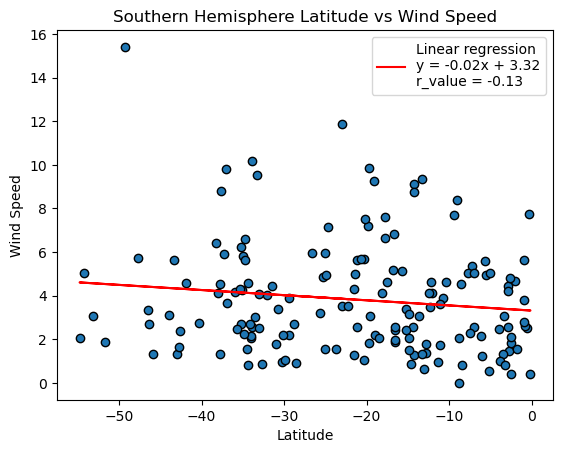

In [113]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], 
                       southern_hemi_df['Wind Speed'], 
                       x_label='Latitude', 
                       y_label='Wind Speed', 
                       title ='Southern Hemisphere Latitude vs Wind Speed')

**Discussion about the linear relationship:** 
No correlation is observed between latitude and wind speed in the Northern Hemisphere, whereas a very small negative correlation is observed in the Southern Hemisphere.